# **1. Importing Libraries**

https://www.kaggle.com/code/dinachanthan/gold-price-prediction

https://www.gold.org/goldhub/data

In [1]:

# All libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.plotting.register_matplotlib_converters()

# **2. Read Dataset**

In [2]:
# Load data into a DataFrame
df = pd.read_csv('gold_monthly_csv.csv')

In [3]:
# Show data
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1950-01,34.73,NaN,NaN,NaN,NaN,NaN
1,1950-02,34.73,NaN,NaN,NaN,NaN,NaN
2,1950-03,34.73,NaN,NaN,NaN,NaN,NaN
3,1950-04,34.73,NaN,NaN,NaN,NaN,NaN
4,1950-05,34.73,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop columns that NaN
df = df.dropna()

In [11]:
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Year


In [4]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Show data
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1950-01-01,34.73,NaN,NaN,NaN,NaN,NaN
1,1950-02-01,34.73,NaN,NaN,NaN,NaN,NaN
2,1950-03-01,34.73,NaN,NaN,NaN,NaN,NaN
3,1950-04-01,34.73,NaN,NaN,NaN,NaN,NaN
4,1950-05-01,34.73,NaN,NaN,NaN,NaN,NaN


In [6]:
# Extract year from Date and add as a new column
df['Year'] = df['Date'].dt.year

In [7]:
# Show data
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Year
0,1950-01-01,34.73,NaN,NaN,NaN,NaN,NaN,1950
1,1950-02-01,34.73,NaN,NaN,NaN,NaN,NaN,1950
2,1950-03-01,34.73,NaN,NaN,NaN,NaN,NaN,1950
3,1950-04-01,34.73,NaN,NaN,NaN,NaN,NaN,1950
4,1950-05-01,34.73,NaN,NaN,NaN,NaN,NaN,1950


In [9]:
# Calculate the average price by year
# yearly_avg = df.groupby('Year')['Price'].mean().round(2).reset_index()
yearly_avg_price = df.groupby('Year')['Price'].mean()

TypeError: Could not convert 34.7334.7334.7334.7334.7334.7334.7334.7334.7334.7334.7334.72 to numeric

In [9]:
# Show data
yearly_avg.head()

,Year,Price
0,1950,34.73
1,1951,34.72
2,1952,34.63
3,1953,34.88
4,1954,35.02


# **3. Exploratory Data Analysis - EDA**

In [10]:
# Descriptive statistic on data
yearly_avg['Price'].describe().T

count      71.000000
mean      423.941268
std       463.671931
min        34.630000
25%        35.605000
50%       317.350000
75%       445.850000
max      1674.830000
Name: Price, dtype: float64

**Let's interpret the descriptive statistics:**

*      Count: 71
        - This indicates that there are 71 data points (years) in the dataset.

*     Mean: 423.94
        - The average price over the period from 1950 to 2020 is approximately 423.94.

*     Standard Deviation (std): 463.67
        - This measures the amount of variation or dispersion of the prices from the mean. A higher standard deviation indicates greater variability in prices.

*     Minimum (min): 34.63
        - The lowest price recorded in the dataset is 34.63.

*     25% (25th percentile): 35.625
        - 25% of the prices are below 35.625. This is also known as the first quartile (Q1).

*     50% (Median or 50th percentile): 317.35
        - 50% of the prices are below 317.35. This is the median price, which is the middle value when the prices are sorted in ascending order.

*     75% (75th percentile): 445.85
        - 75% of the prices are below 445.85. This is also known as the third quartile (Q3).

*     Maximum (max): 1674.83
        - The highest price recorded in the dataset is 1674.83.

These statistics provide a summary of the central tendency, dispersion, and range of the prices over the period from 1950 to 2020. The wide range between the minimum and maximum values, along with a high standard deviation, indicates that the prices have varied significantly over the years. The median being lower than the mean suggests that there were some very high prices that skewed the average upwards.

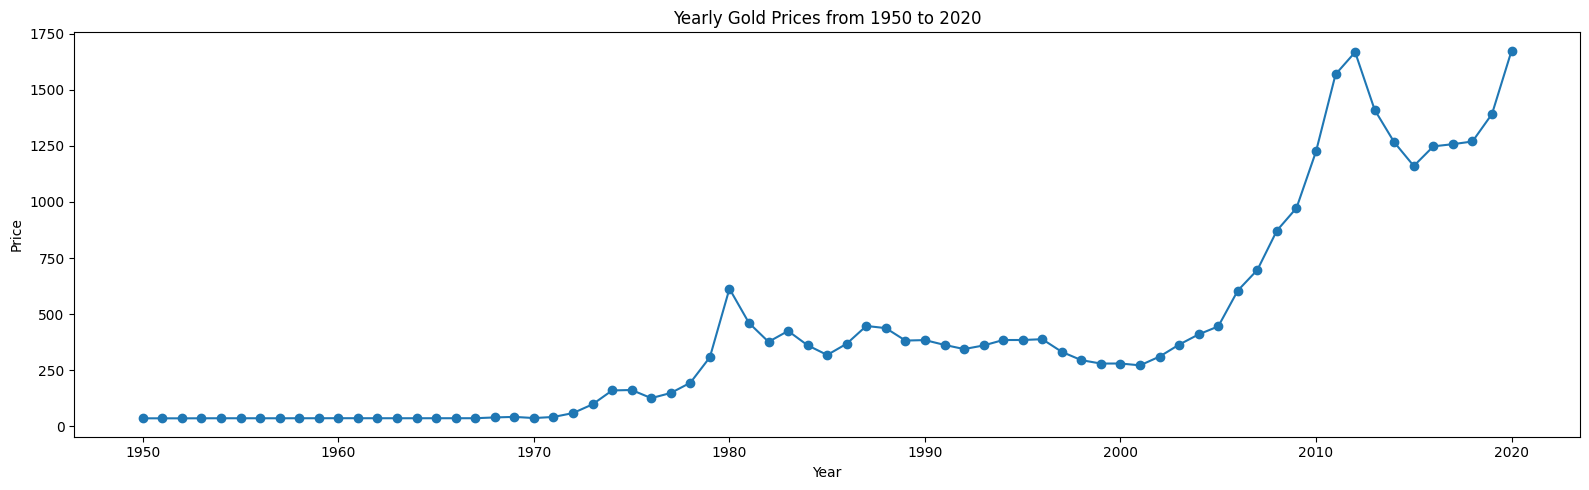

In [11]:
# Plotting the data
plt.figure(figsize=(16, 5))
plt.plot(yearly_avg['Year'], yearly_avg['Price'], marker='o')

# Add title and labels
plt.title('Yearly Gold Prices from 1950 to 2020')
plt.xlabel('Year')
plt.ylabel('Price')

# Enable Grid View
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

The plot shows the price trend from 1950 to 2020. It is evident that prices remained relatively stable until the late 1960s, after which there were significant increases, particularly noticeable around 1980 and after 2000.

Next, let's analyze these trends and use a time series model to make predictions. We'll use the following steps:

- Decompose the time series to understand the trend, seasonality, and residual components.
- Fit a model to the data to make future predictions.

In [12]:
# Decompose the time series
yearly_avg.set_index('Year', inplace=True)
decomposition = sm.tsa.seasonal_decompose(yearly_avg['Price'], model='multiplicative', period=1)

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 10)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'sm' is not defined

**The time series decomposition shows:**

- Trend: There's a clear upward trend starting around 1970 with significant increases in the late 1970s and post-2000s.
- Seasonal: The seasonal component appears flat, indicating that seasonality is not a significant factor in this dataset.
- Residual: The residual component shows some variability, indicating the presence of other factors influencing the prices.

# **4. Goal Price Prediction**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(yearly_avg['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 10 years (2021-2030)
forecast = model_fit.forecast(steps=10)
forecast_years = list(range(2021, 2031))

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(yearly_avg.index, yearly_avg['Price'], label='Observed', marker='o')
plt.plot(forecast_years, forecast, label='Forecast', marker='o')

# Add title and labels
plt.title('Gold Price Forecast for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Price')

# Add Legend
plt.legend()

# Enable Grid View
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

forecast

The plot shows the observed prices from 1950 to 2020 and the forecasted prices from 2021 to 2030.

***Forecasting Gold Price by Year:***

**2021    = 1799.951880 <br>
2022    = 1816.417349 <br>
2023    = 1818.199687 <br>
2024    = 1820.365040 <br>
2025    = 1806.218162 <br>
2026    = 1790.335441 <br>
2027    = 1783.692068 <br>
2028    = 1782.415615 <br>
2029    = 1781.741619 <br>
2030    = 1781.864727**

# **Thank you!**

# Homework
1. Find better data of Gold
2. Using SARIMA, SARIMAX model
Reference: https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6 